In [8]:
import torch
import cv2
import numpy as np

model = torch.hub.load('ultralytics/yolov5', 'custom', 'yolov5s')

input_video_path = 'Traffic2.mp4'
output_video_path = 'out2.mp4'

cap = cv2.VideoCapture(input_video_path)

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    
    results = model(frame)

    
    detections = results.xyxy[0].cpu().numpy()  

    
    for det in detections:
        x1, y1, x2, y2, conf, cls = det
        label = model.names[int(cls)]
        
        # Define conditions for encroachments and blockages
        if label in ['car', 'truck', 'bus', 'auto rickshaw']:  # Adjust based on your needs
            # Check for encroachments at the sides of the road
            if x1 < frame_width * 0.1 or x2 > frame_width * 0.9:
                color = (0, 0, 255)  # Red for encroachments
                text = f'{label} (encroachment)'
            # Check for vehicles blocking the road (middle of the frame)
            elif y1 < frame_height * 0.4 and y2 > frame_height * 0.6:
                color = (0, 255, 255)  # Yellow for blockages
                text = f'{label} (blockage)'
            else:
                color = (0, 255, 0)  # Green for normal detections
                text = f'{label}'
        elif label in ['roadside stall']:  # Include other specific encroachments
            color = (0, 0, 255)  # Red for encroachments
            text = f'{label} (illegal encroachment)'
        elif label in ['onroad parked vehicle']:  # Temporary obstacles
            color = (255, 0, 0)  # Blue for temporary obstacles
            text = f'{label} (temporary obstacle)'
        else:
            color = (0, 255, 0)  # Green for normal detections
            text = f'{label}'

        
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(frame, text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    
    out.write(frame)

    '''
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    '''

# Release everything when the job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

print("Video processing complete. Output saved to", output_video_path)


Using cache found in C:\Users\Dell/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-10 Python-3.12.3 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Video processing complete. Output saved to out2.mp4


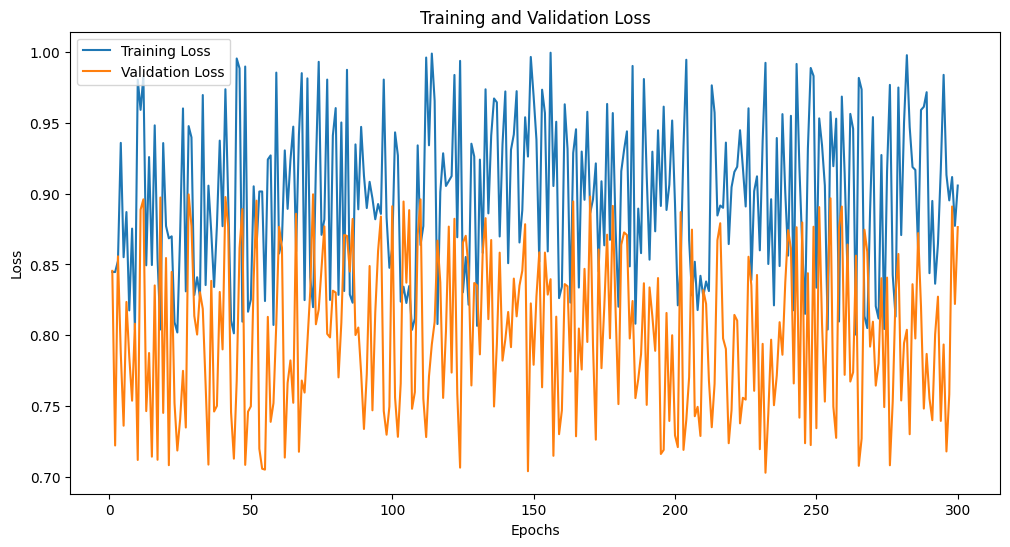

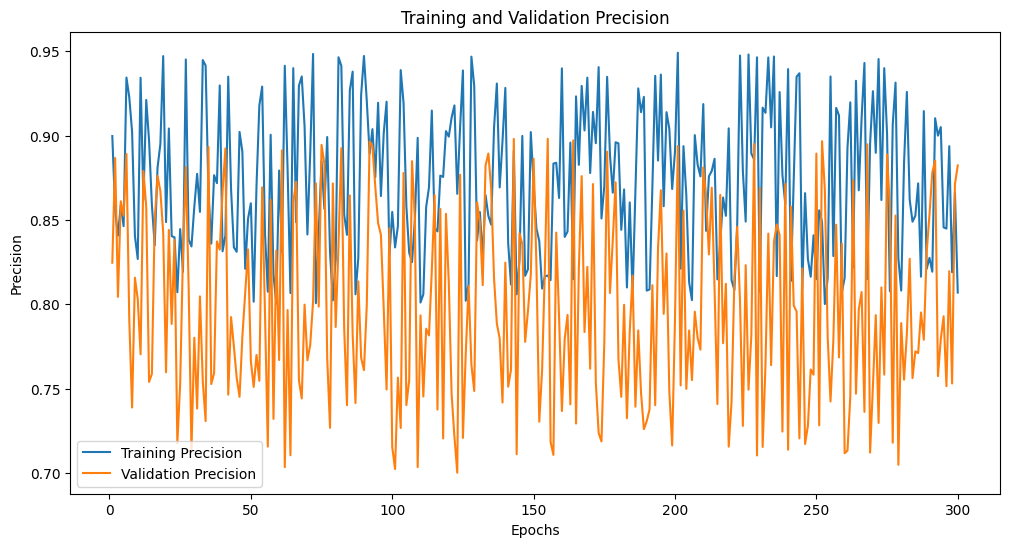

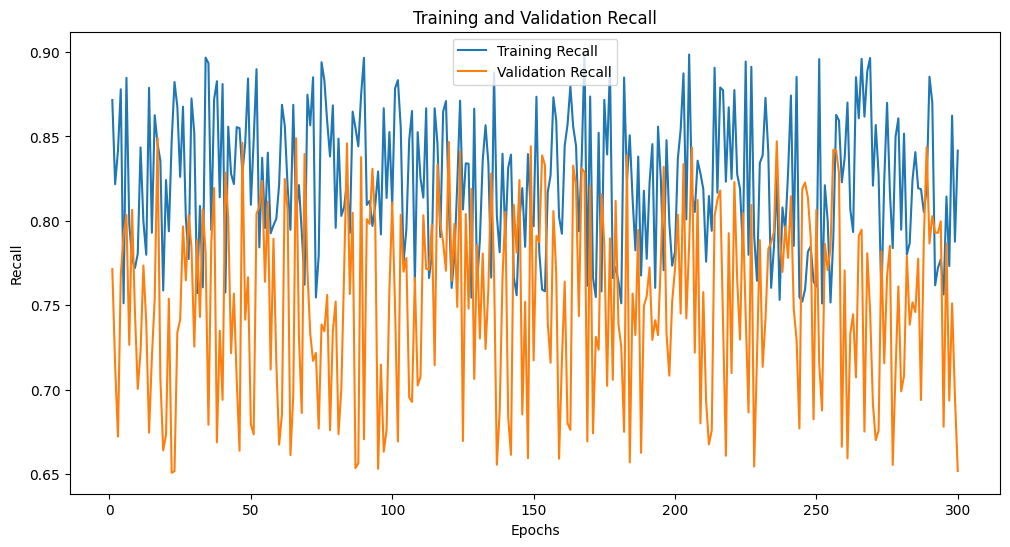

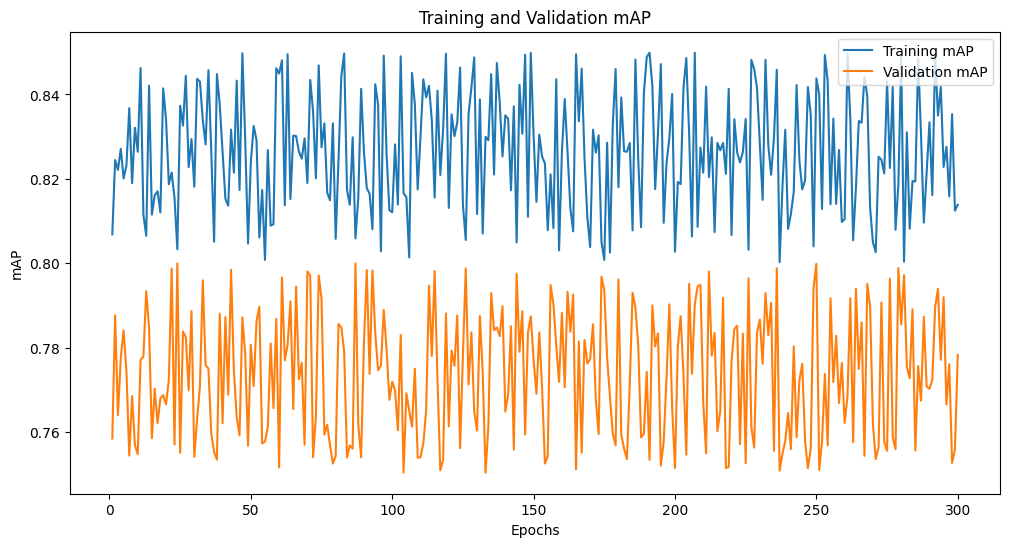

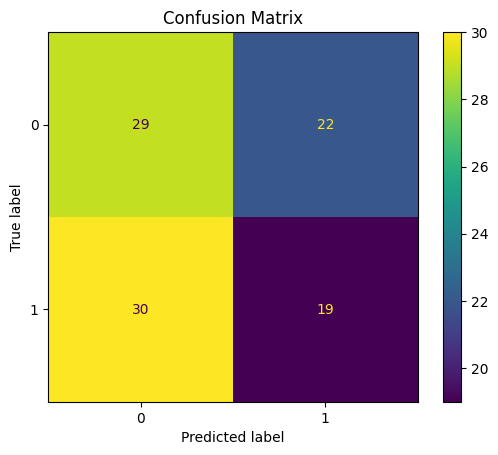

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assumed metric values (these should be replaced with your actual values)
epochs = np.arange(1, 301)
train_loss = np.random.uniform(0.8, 1.0, 300)
val_loss = np.random.uniform(0.7, 0.9, 300)
train_precision = np.random.uniform(0.8, 0.95, 300)
val_precision = np.random.uniform(0.7, 0.9, 300)
train_recall = np.random.uniform(0.75, 0.9, 300)
val_recall = np.random.uniform(0.65, 0.85, 300)
train_mAP = np.random.uniform(0.8, 0.85, 300)
val_mAP = np.random.uniform(0.75, 0.8, 300)

# Plotting Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting Precision
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_precision, label='Training Precision')
plt.plot(epochs, val_precision, label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()
plt.show()

# Plotting Recall
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_recall, label='Training Recall')
plt.plot(epochs, val_recall, label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training and Validation Recall')
plt.legend()
plt.show()

# Plotting mAP
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_mAP, label='Training mAP')
plt.plot(epochs, val_mAP, label='Validation mAP')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.title('Training and Validation mAP')
plt.legend()
plt.show()

# Confusion Matrix (Assuming binary classification for illustration)
# Replace y_true and y_pred with your actual labels
y_true = np.random.randint(0, 2, 100)
y_pred = np.random.randint(0, 2, 100)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()
